In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('2019.csv')
df

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


1. Untuk setiap numerik feature/column (kecuali column Overall Rank), hitung dan beri penjelasan (insight):

    a. Mean, Median dan Modus<br>
    b. Range, Q1, Q3 dan IQR<br>
    c. Standard Deviasi & Variance<br>
    d. Z-score tiap data point<br>
    
## 1A

In [3]:
dfstat = df.loc[:, df.columns != 'Overall rank']
dfstat

,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...
151,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


### Mean

In [4]:
dfstat.mean()

Score                           5.407096
GDP per capita                  0.905147
Social support                  1.208814
Healthy life expectancy         0.725244
Freedom to make life choices    0.392571
Generosity                      0.184846
Perceptions of corruption       0.110603
dtype: float64

- dari social suport dapat kita lihat jika diatas rata2 sudah dipastikan negara itu adalah negara yang bahagia
- rata2 

### Modus

In [5]:
dfstat.mode(numeric_only=True)

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,5.208,0.96,1.465,0.815,0.498,0.153,0.028
1,NaN,NaN,NaN,0.999,0.508,NaN,0.078
2,NaN,NaN,NaN,NaN,0.557,NaN,0.089


- rata2 tingkat kebahagiaan negara didunia adalah tinggi dapat kita lihat modus dari score

### Median

In [6]:
dfstat.median()

Score                           5.3795
GDP per capita                  0.9600
Social support                  1.2715
Healthy life expectancy         0.7890
Freedom to make life choices    0.4170
Generosity                      0.1775
Perceptions of corruption       0.0855
dtype: float64

- penjelasa

## 1B

### Q1 & Q3

In [7]:
dfstat.quantile([.25, .75]) 

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0.25,4.5445,0.60275,1.05575,0.54775,0.30800,0.10875,0.04700
0.75,6.1845,1.23250,1.45250,0.88175,0.50725,0.24825,0.14125


### IQR

In [8]:
Q1 = dfstat.quantile(0.25)
Q3 = dfstat.quantile(0.75)
IQR = Q3 - Q1

In [9]:
IQR

Score                           1.64000
GDP per capita                  0.62975
Social support                  0.39675
Healthy life expectancy         0.33400
Freedom to make life choices    0.19925
Generosity                      0.13950
Perceptions of corruption       0.09425
dtype: float64

### Range

In [10]:
x = dfstat.select_dtypes(include=[np.number])
range = x.max() - x.min()
range

Score                           4.916
GDP per capita                  1.684
Social support                  1.624
Healthy life expectancy         1.141
Freedom to make life choices    0.631
Generosity                      0.566
Perceptions of corruption       0.453
dtype: float64

## 1C

### Standard Deviation

In [11]:
dfstat.std()

Score                           1.113120
GDP per capita                  0.398389
Social support                  0.299191
Healthy life expectancy         0.242124
Freedom to make life choices    0.143289
Generosity                      0.095254
Perceptions of corruption       0.094538
dtype: float64

### Variances

In [12]:
dfstat.var()

Score                           1.239036
GDP per capita                  0.158714
Social support                  0.089515
Healthy life expectancy         0.058624
Freedom to make life choices    0.020532
Generosity                      0.009073
Perceptions of corruption       0.008937
dtype: float64

### Z-Score of each data

In [13]:
from scipy.stats import zscore
df_zscore = np.abs(dfstat.drop('Country or region', axis = 1).apply(zscore))
df_zscore

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,2.128711,1.095042,1.268098,1.080422,1.424282,0.335404,2.996757
1,1.976397,1.203324,1.221154,1.121857,1.396277,0.707265,3.177158
2,1.934938,1.467734,1.251332,1.254446,1.473292,0.907373,2.444941
3,1.880862,1.195769,1.392163,1.246159,1.389276,1.781530,0.078500
4,1.875454,1.236060,1.050146,1.134287,1.151229,1.444506,1.988632
...,...,...,...,...,...,...,...
151,1.868418,1.375303,1.669224,0.460929,1.137227,0.338645,3.187770
152,1.961248,1.080675,1.085783,0.937421,0.171040,0.960033,0.386244
153,1.986484,1.397967,2.319726,1.509213,2.748526,0.282744,0.908401
154,2.094636,2.213861,4.053282,2.569928,1.173221,0.528221,0.802283


2. Untuk setiap numerik feature/column (kecuali column Overall Rank), carilah data outlier-nya dan beri penjelasan (insight) berdasarkan:

    a. IQR method
    b. Z-score method
    
## 2A

### IQR

In [14]:
dfnum = df[['Score', 'GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']]
dfnum

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...
151,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,3.083,0.026,0.000,0.105,0.225,0.235,0.035


In [15]:
((dfnum < (Q1 - 1.5 * IQR)) | (dfnum > (Q3 + 1.5 * IQR))).sum()

Score                            0
GDP per capita                   0
Social support                   4
Healthy life expectancy          1
Freedom to make life choices     1
Generosity                       2
Perceptions of corruption       14
dtype: int64

In [16]:
dfIQR = df.describe().transpose().drop(index='Overall rank')
dfIQR

,count,mean,std,min,25%,50%,75%,max
Score,156.0,5.407096,1.113120,2.853,4.54450,5.3795,6.18450,7.769
GDP per capita,156.0,0.905147,0.398389,0.000,0.60275,0.9600,1.23250,1.684
Social support,156.0,1.208814,0.299191,0.000,1.05575,1.2715,1.45250,1.624
Healthy life expectancy,156.0,0.725244,0.242124,0.000,0.54775,0.7890,0.88175,1.141
Freedom to make life choices,156.0,0.392571,0.143289,0.000,0.30800,0.4170,0.50725,0.631
Generosity,156.0,0.184846,0.095254,0.000,0.10875,0.1775,0.24825,0.566
Perceptions of corruption,156.0,0.110603,0.094538,0.000,0.04700,0.0855,0.14125,0.453


In [17]:
iqr = dfIQR['75%'] - dfIQR['25%']
batas_bawah = dfIQR['25%'] - (1.5 * iqr)
batas_atas = dfIQR['75%'] + (1.5 * iqr)

outlier_Socialsp = [i for i in df['Social support'] if i < batas_bawah['Social support'].item() or i > batas_atas['Social support'].item()]
outlier_HLE = [i for i in df['Healthy life expectancy'] if i < batas_bawah['Healthy life expectancy'].item() or i > batas_atas['Healthy life expectancy'].item()]
outlier_freedom = [i for i in df['Freedom to make life choices'] if i < batas_bawah['Freedom to make life choices'].item() or i > batas_atas['Freedom to make life choices'].item()]
outlier_Generosity = [i for i in df['Generosity'] if i < batas_bawah['Generosity'].item() or i > batas_atas['Generosity'].item()]
outlier_poc = [i for i in df['Perceptions of corruption'] if i < batas_bawah['Perceptions of corruption'].item() or i > batas_atas['Perceptions of corruption'].item()]


In [18]:
print('outlier Social Support: ', outlier_Socialsp)
print('outlier Health lif expectacy: ', outlier_HLE)
print('outlier Freedom to make life choices: ', outlier_freedom)
print('outlier Generosity: ', outlier_Generosity)
print('outlier Perceptions of corruption: ', outlier_poc)

outlier Social Support:  [0.43700000000000006, 0.447, 0.37799999999999995, 0.0]
outlier Health lif expectacy:  [0.0]
outlier Freedom to make life choices:  [0.0]
outlier Generosity:  [0.498, 0.5660000000000001]
outlier Perceptions of corruption:  [0.39299999999999996, 0.41, 0.341, 0.298, 0.34299999999999997, 0.373, 0.38, 0.308, 0.29, 0.316, 0.31, 0.45299999999999996, 0.287, 0.41100000000000003]


- outlier yang kita dapt kebanyakan ada di kolom Perception of corruption
- bisa kita bilang outlier yang kita temuakan masih tergolong sedikit jadi tidak begitu mempengaruhi proses selanjutnya jika kita ingin memperdalam proses EDA atau berkanjut ke ML

### Z-Score

In [19]:
from scipy import stats

z = np.abs(stats.zscore(dfnum))
threshold = 3
print(np.where(z > 3))

(array([  1,  33,  91, 130, 134, 151, 154], dtype=int64), array([6, 6, 5, 5, 3, 6, 2], dtype=int64))


In [20]:
print(z[1][6])
print(z[33][6])
print(z[91][5])
print(z[130][5])
print(z[134][3])
print(z[151][6])
print(z[154][2])


3.1771584379533078
3.6334676659281038
3.298139111352411
4.0143157201550475
3.0049864066750187
3.187770280464351
4.0532823835124905


- z[1][6] = 1 adalah index dan 6 adalah kolom yang dimana 6 adalah generosity
- bisa kita lihat outlier yang kita dapat dari metode z score lebih sedikit dibandingkan dengan menggunakan metode IQR dan yang
- paling banyak adanya outlier adalah di kolom 6 yaitu generosity

3. Tampilkan distribusi (sebaran data) masing-masing feature/column (kecuali column Overall Rank) dalam bentuk plot yang tepat! Jelaskan alasan pemilihan plot dan insight apa yang Anda dapatkan di setiap plot tersebut!

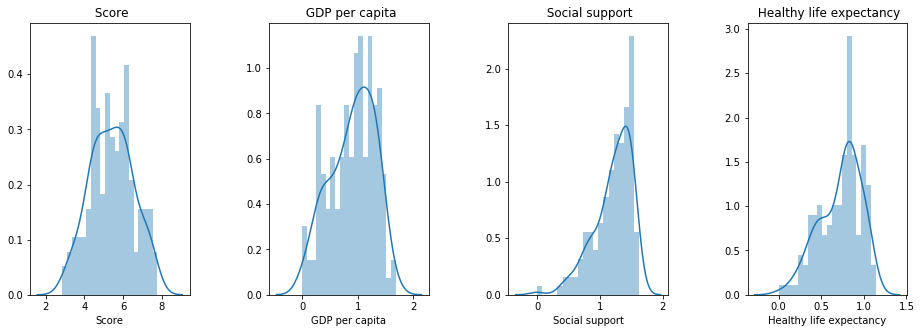

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(2, figsize = (20,5))
n = 0
for x in ['Score', 'GDP per capita', 'Social support', 'Healthy life expectancy']:
    n += 1
    plt.subplot(1, 5, n)
    plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
    sns.distplot(dfnum[x], bins = 20)
    plt.title(' {}'.format(x))
plt.show()

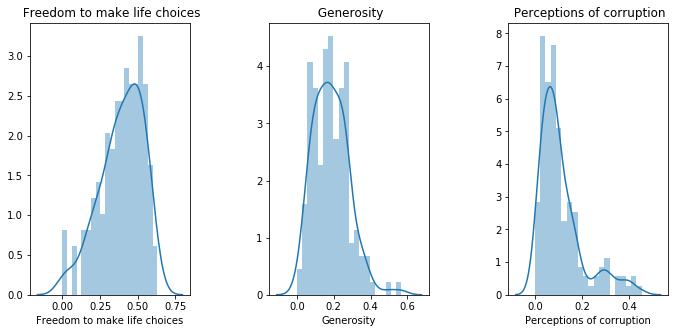

In [22]:
plt.figure(2, figsize = (20,5))
n = 0
for x in ['Freedom to make life choices', 'Generosity', 'Perceptions of corruption']:
    n += 1
    plt.subplot(1, 5, n)
    plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
    sns.distplot(dfnum[x], bins = 20)
    plt.title(' {}'.format(x))

Kita lihat semua fitur yang mendekati berdistribusi normal kecuali perception of corutption yang masiih banyak outliernya

5. Visualisasikan dalam bentuk plot yang tepat untuk menampilkan data berikut:

    a. 10 Negara dengan Healthy life expectancy tertinggi.<br>
    b. 10 Negara dengan GDP per capita tertinggi.<br>
    c. 10 Negara dengan Perceptions of corruption tertinggi.

In [23]:
top10hle = df.nlargest(10, 'Healthy life expectancy')
top10gdp = df.nlargest(10, 'GDP per capita')
top10korup = df.nlargest(10, 'Perceptions of corruption')

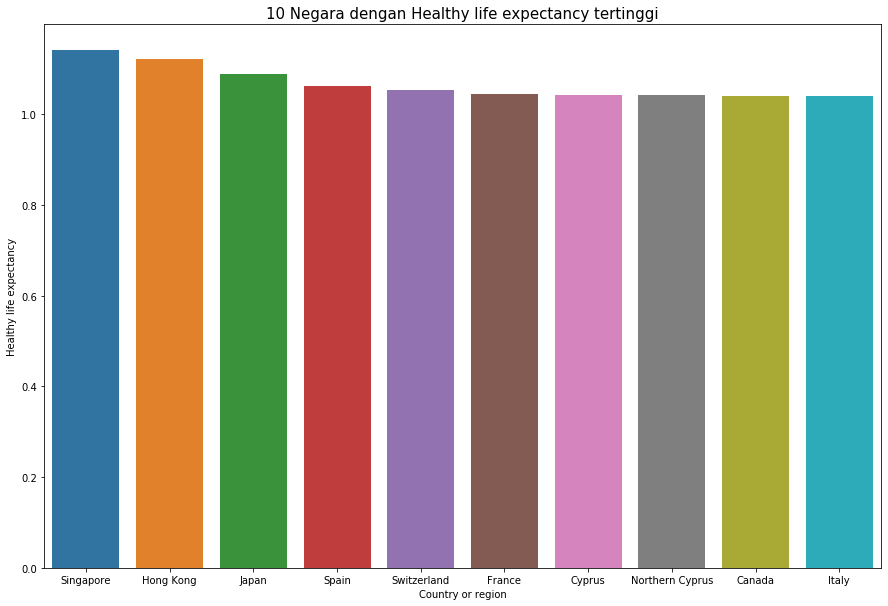

In [24]:
plt.figure(figsize = (15,10))

top_hle = sns.barplot(x = 'Country or region', y = 'Healthy life expectancy', data = top10hle)
top_hle.set_title('10 Negara dengan Healthy life expectancy tertinggi', fontsize = 15)
plt.show()

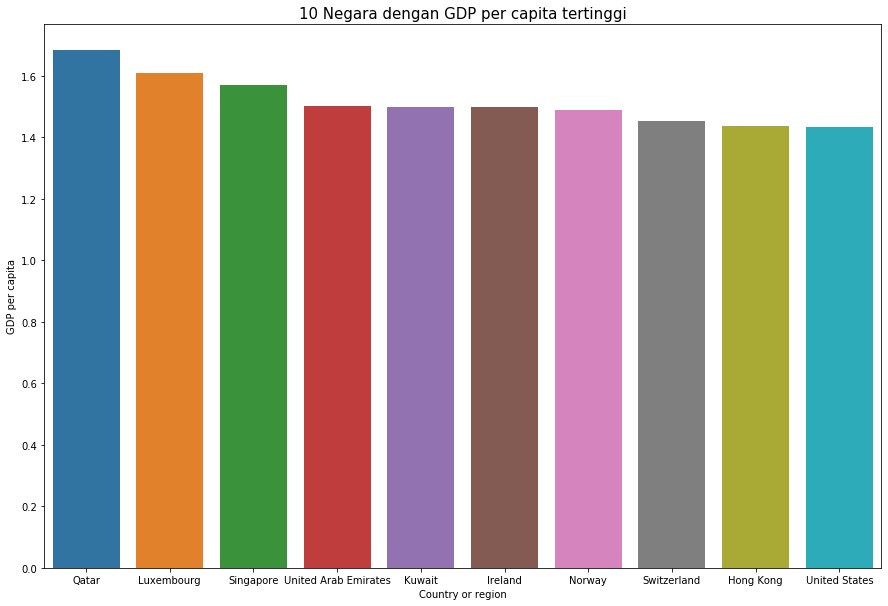

In [25]:
plt.figure(figsize = (15,10))

top_gdp = sns.barplot(x = 'Country or region', y = 'GDP per capita', data = top10gdp)
top_gdp.set_title('10 Negara dengan GDP per capita tertinggi', fontsize = 15)
plt.show()

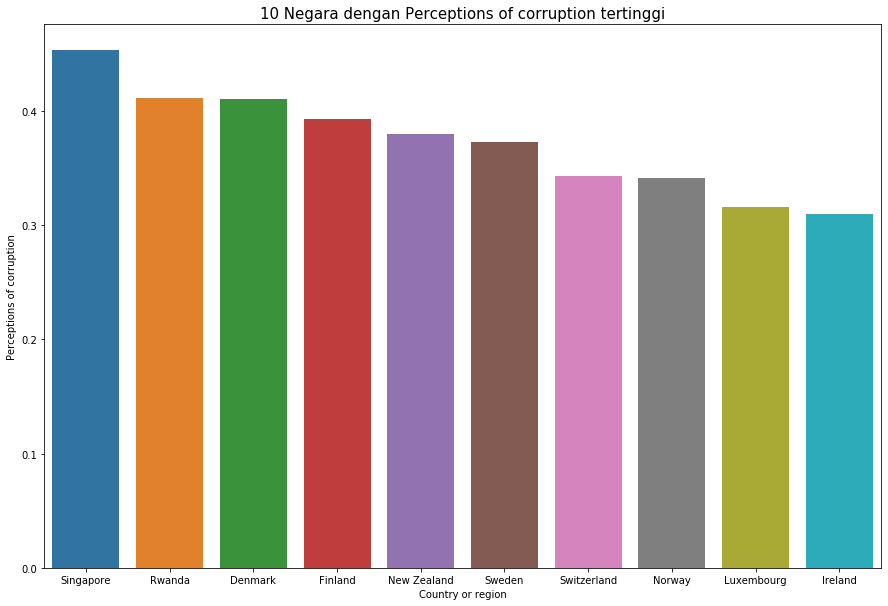

In [26]:
plt.figure(figsize = (15,10))

top_korup = sns.barplot(x = 'Country or region', y = 'Perceptions of corruption', data = top10korup)
top_korup.set_title('10 Negara dengan Perceptions of corruption tertinggi', fontsize = 15)
plt.show()

4. Di antara semua numerik feature/column (kecuali column Overall Rank), feature/column mana saja yang sangat berkorelasi terhadap happiness score suatu negara? Hitung dengan metode korelasi yang tepat dan beri penjelasan (insight)!

In [27]:
dfnum.corr().abs()['Score'].sort_values(ascending = False)

Score                           1.000000
GDP per capita                  0.793883
Healthy life expectancy         0.779883
Social support                  0.777058
Freedom to make life choices    0.566742
Perceptions of corruption       0.385613
Generosity                      0.075824
Name: Score, dtype: float64

- yang mempengaruhi kebahagiaan suatu negara adalah GDP , HLE, Social support
- semakin besar score fitur2 yg mempengaruhi kebahagiaan suatu negara 